# Modeling
The notebook includes modeling part of car price prediction project.
## Load packages

In [1]:
import pandas as pd 
from functions import   remove_space, encoding, evaluation
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from model import model
seed=123

## Modeling - preparation
Features chosen to modeling:
1. Age
2. KM's driven
3. make_new_1 
4. make_new_2 
5. is_petrol
6. Assembly
7. registration_city
8. Transmission
9. Car features - these variable is already encoded to 0/1 variables.

### Features encoding
Encoding of categorical features for variables with only two possible value will be made as one hot encoding while the others (make and registration city) will be made as label encoder sorted by average price which helps decision tree based algorithm to produce smaller trees with the same accuracy.

In [2]:
data= pd.read_csv('olx_cars_adjusted.csv')

In [3]:
data = remove_space(data)

In [4]:
cols_to_one_hot = ['is_petrol', 'Assembly', 'Transmission']
cols_to_one_hot_enc = ['is_petrol_True', 'Assembly_Local','Transmission_Manual']
cols_to_avg = ['make_new_1', 'make_new_2', 'registration_city']
cols_avg_enc = [i + "_encoded" for i in cols_to_avg ]
numerical_features_x =["KM's_driven", 'Age']
all_features = ['USB_and_Auxillary_Cable',
 'AM/FM_Radio',
 'Heated_Seats',
 'ABS',
 'Power_Steering',
 'Rear_Camera',
 'Climate_Control',
 'Power_Windows',
 'DVD_Player',
 'Cool_Box',
 'Keyless_Entry',
 'Air_Conditioning',
 'Rear_Seat_Entertainment',
 'Immobilizer_Key',
 'Power_Locks',
 'Sun_Roof',
 'Cruise_Control',
 'Air_Bags',
 'Front_Speakers',
 'CD_Player',
 'Power_Mirrors',
 'Rear_speakers',
 'Steering_Switches',
 'Front_Camera',
 'Rear_AC_Vents',
 'Cassette_Player',
 'Navigation_System',
 'Alloy_Rims']

In [5]:
data = encoding(data,cols_to_one_hot, cols_to_avg,'Price')

In [6]:
train_X, test_X, train_y, test_y = train_test_split(data,data['Price'], test_size=0.3, random_state=seed)

In [7]:
final_models_feature = []
final_models_feature.extend(numerical_features_x)
final_models_feature.extend(cols_avg_enc)
final_models_feature.extend(all_features)
final_models_feature.extend(cols_to_one_hot_enc)

In [8]:
categorical_features = []
categorical_features.extend(cols_avg_enc)
categorical_features.extend(all_features)
categorical_features.extend(cols_to_one_hot_enc)

In [9]:
model_1 = model(numerical_features=numerical_features_x, cat_features=categorical_features, train_X=train_X,
                train_y=train_y,seed=seed,fold_no=3,obj='rmse')
model_1.train(n_trials=1)

[I 2024-01-08 23:21:31,303] A new study created in memory with name: no-name-96d43c96-d14e-423c-b1e9-e997a5857a17
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:685: UserWarning: Found 'num_iterations' in params. Will use it instead of 'num_boost_round' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'num_boost_round' argument")
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 4069, number of used features: 35
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 4069, number of used features: 35
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 4070, number of used features: 35
[LightGBM] [Info] Start training from score 2110945.351683
[LightGBM] [Info] Start training from score 2112208.745884
[LightGBM] [Info] Start training from score 2124474.260197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2024-01-08 23:22:04,029] Trial 0 finished with value: 338362.31443452387 and parameters: {'objective': 'regression', 'boosting': 'dart', 'learning_rate': 0.5703110645641458, 'num_iterations': 955, 'max_depth': 2, 'min_data_in_leaf': 17, 'bagging_fraction': 0.9890739245478777, 'lambda_l1': 0.26516220487734277, 'lambda_l2': 9.692454819472378, 'num_leaves': 77, 'linear_lambda': 4.325356279887642, 'min_gain_to_split': 1.1606564820899934, 'drop_rate': 0.57667137735795, 'max_drop': 54, 'make_var': 'make_new_2_encoded'}. Best is trial 0 with value: 338362.31443452387.
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:685: UserWarning: Found 'num_iterations' in params. Will use it instead of 'num_boost_round' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'num_boost_round' argument")
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least po

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 4069, number of used features: 34
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 4069, number of used features: 34
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points

In [10]:
pred_train = model_1.predict(train_X,y_name='Price')
pred_test = model_1.predict(test_X,y_name='Price')

In [11]:
model_1.importance_calculation()
model_1.importance

Age                          737.0
KM's_driven                  355.0
Transmission_Manual          280.0
ABS                          173.0
Assembly_Local               155.0
Power_Steering               128.0
Power_Mirrors                122.0
Power_Windows                106.0
registration_city_encoded    104.0
Cruise_Control                86.0
Rear_Camera                   62.0
Air_Bags                      46.0
Sun_Roof                      37.0
Alloy_Rims                    36.0
Air_Conditioning              33.0
Rear_AC_Vents                 30.0
AM/FM_Radio                   27.0
Front_Speakers                27.0
Front_Camera                  26.0
Steering_Switches             25.0
Climate_Control               25.0
USB_and_Auxillary_Cable       25.0
Power_Locks                   25.0
Navigation_System             21.0
Heated_Seats                  19.0
Cool_Box                      18.0
CD_Player                     18.0
Rear_Seat_Entertainment       13.0
DVD_Player          

  dataset        r2            mae      mape           rmse
0   train  0.810049  375243.704699  0.219201   506953.47065
1    test  0.774056   395783.46052  0.234746  543033.192868


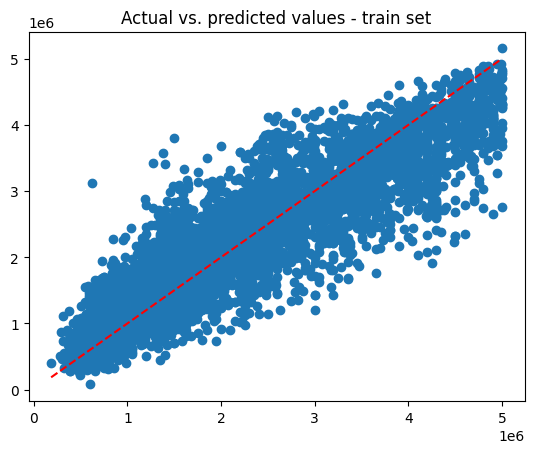

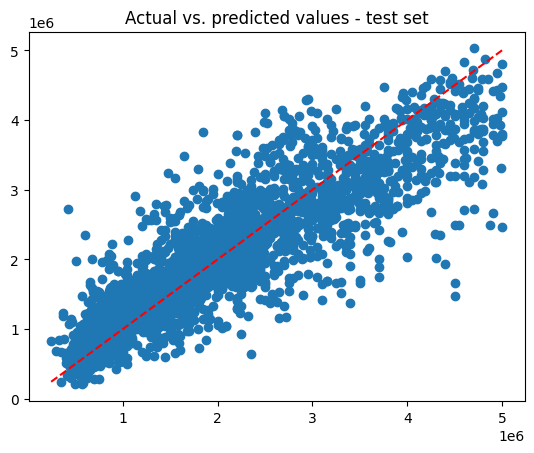

In [19]:
evaluation(pred_train=pred_train['prediction'], 
           train_y = pred_train['y_true'], 
           pred_test = pred_test['prediction'], 
           test_y = pred_test['y_true'])

### Model with the highest importance features

In [12]:
model_1.importance[0:10]

Age                          737.0
KM's_driven                  355.0
Transmission_Manual          280.0
ABS                          173.0
Assembly_Local               155.0
Power_Steering               128.0
Power_Mirrors                122.0
Power_Windows                106.0
registration_city_encoded    104.0
Cruise_Control                86.0
Name: importance, dtype: float64

In [13]:
## filtered features
filtered_features = list(model_1.importance[0:10].index.values)

['Age',
 "KM's_driven",
 'Transmission_Manual',
 'ABS',
 'Assembly_Local',
 'Power_Steering',
 'Power_Mirrors',
 'Power_Windows',
 'registration_city_encoded',
 'Cruise_Control']

In [17]:
cat_features_filtered = [i for i in filtered_features if i not in ['Age',"KM's_driven"]]

['Transmission_Manual',
 'ABS',
 'Assembly_Local',
 'Power_Steering',
 'Power_Mirrors',
 'Power_Windows',
 'registration_city_encoded',
 'Cruise_Control']

In [18]:
model_2 = model(numerical_features=numerical_features_x, cat_features=cat_features_filtered, train_X=train_X,
                train_y=train_y,seed=seed,fold_no=3,obj='rmse')
model_2.train(n_trials=1)

[I 2024-01-08 23:24:58,785] A new study created in memory with name: no-name-666577d1-b9aa-4456-95db-981bc5c5163a
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:685: UserWarning: Found 'num_iterations' in params. Will use it instead of 'num_boost_round' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'num_boost_round' argument")
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 4069, number of used features: 10
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 4069, number of used features: 10
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 4070, number of used features: 10
[LightGBM] [Info] Start training from score 2110945.351683
[LightGBM] [Info] Start training from score 2112208.745884
[LightGBM] [Info] Start training from score 2124474.260197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-01-08 23:25:21,277] Trial 0 finished with value: 564475.2754046744 and parameters: {'objective': 'regression', 'boosting': 'dart', 'learning_rate': 0.14935027702798825, 'num_iterations': 382, 'max_depth': 8, 'min_data_in_leaf': 21, 'bagging_fraction': 0.8598330901497615, 'lambda_l1': 4.496798417498433, 'lambda_l2': 9.716133677103604, 'num_leaves': 7, 'linear_lambda': 4.791857478488691, 'min_gain_to_split': 2.2987183257023123, 'drop_rate': 0.22839752731673846, 'max_drop': 69, 'make_var': 'make_new_2_encoded'}. Best is trial 0 with value: 564475.2754046744.
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:685: UserWarning: Found 'num_iterations' in params. Will use it instead of 'num_boost_round' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'num_boost_round' argument")
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least pop

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 4069, number of used features: 10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 4069, number of used features: 10
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points

In [21]:
pred_train = model_2.predict(train_X,y_name='Price')
pred_test = model_2.predict(test_X,y_name='Price')

  dataset        r2            mae      mape           rmse
0   train  0.784283  396664.541978  0.224947  540244.154773
1    test  0.761473  401212.888571  0.231923  557949.628709


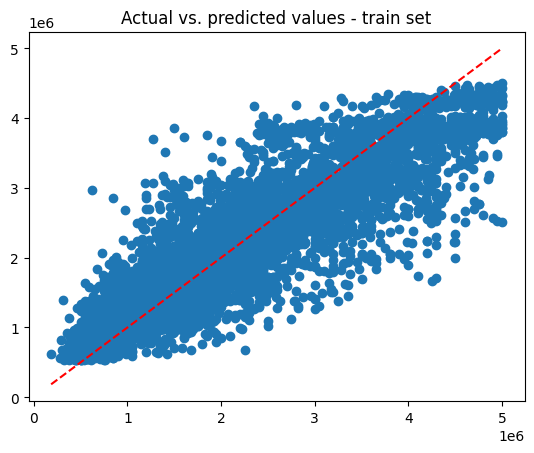

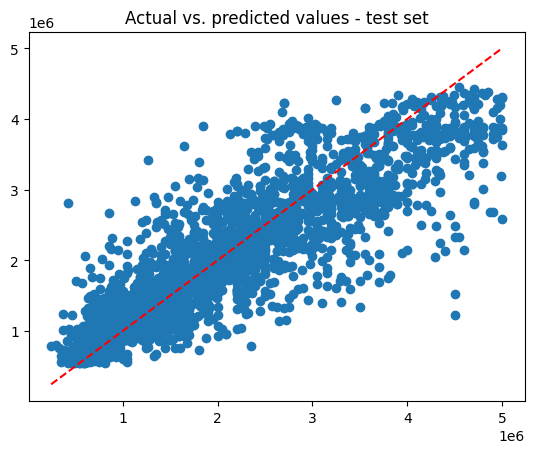

In [22]:
evaluation(pred_train=pred_train['prediction'], 
           train_y = pred_train['y_true'], 
           pred_test = pred_test['prediction'], 
           test_y = pred_test['y_true'])

In [23]:
model_2.importance_calculation()
model_2.importance

Age                          662.0
Transmission_Manual          317.0
Assembly_Local               235.0
KM's_driven                  226.0
ABS                          222.0
Power_Steering               164.0
Power_Mirrors                132.0
Power_Windows                130.0
registration_city_encoded     94.0
Cruise_Control                87.0
Name: importance, dtype: float64

## Linear regression benchmark

In [25]:
lr = LinearRegression().fit(train_X[model_2.final_models_feature],train_y)

In [28]:
pred_lr_train = lr.predict(train_X[model_2.final_models_feature])
pred_lr_test = lr.predict(test_X[model_2.final_models_feature])

  dataset        r2            mae      mape           rmse
0   train  0.691764  507594.766433  0.305347  645786.609988
1    test  0.690417  496740.421861  0.309269  635645.888553


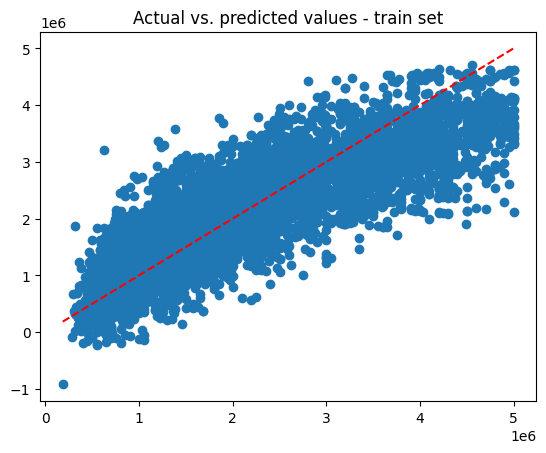

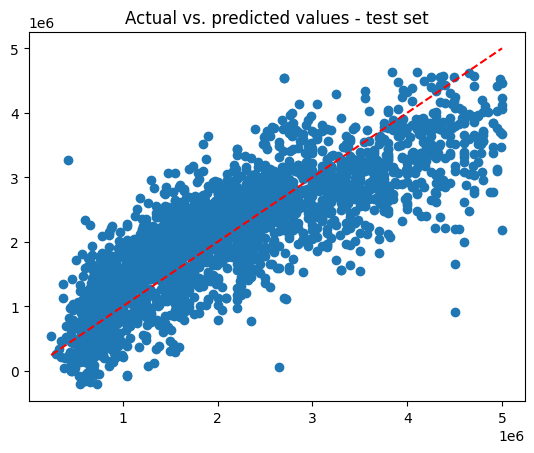

In [29]:
evaluation(pred_train=pred_lr_train, 
           train_y = pred_train['y_true'], 
           pred_test = pred_lr_test, 
           test_y = pred_test['y_true'])